In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the dataset
file_path = './dataset/melbourne_houses_price.csv'  # Ensure this is the correct file path
try:
    houses_price_data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"The file {file_path} was not found.")
    # Handle file not found situation, for example by exiting the script
    # exit()

houses_price_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,01-04-2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,01-04-2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,01-04-2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,01-04-2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,01-04-2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31-03-2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31-03-2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31-03-2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31-03-2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [3]:
# Select only the numeric columns for median calculation
numeric_columns = houses_price_data.select_dtypes(include=[np.number])

# Calculate medians only for numeric columns
numeric_medians = numeric_columns.median()

# Apply the median to fill missing values only in the numeric columns
houses_price_data[numeric_columns.columns] = numeric_columns.fillna(numeric_medians)

# Standardize the numeric columns
X = StandardScaler().fit_transform(houses_price_data[numeric_columns.columns])
X1 = pd.DataFrame(X, columns=numeric_columns.columns)

def plot_model(labels, alg_name, plot_index):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, plot_index)
    color_code = {'anomaly':'red', 'normal':'green'}
    colors = [color_code[x] for x in labels]

    ax.scatter(X1.iloc[:, 0], X1.iloc[:, 1], color=colors, marker='.', label='red = anomaly')
    ax.legend(loc="lower right")
    ax.set_title(alg_name)

    # In a Jupyter notebook environment, use plt.show() instead of fig.show()
    plt.show()

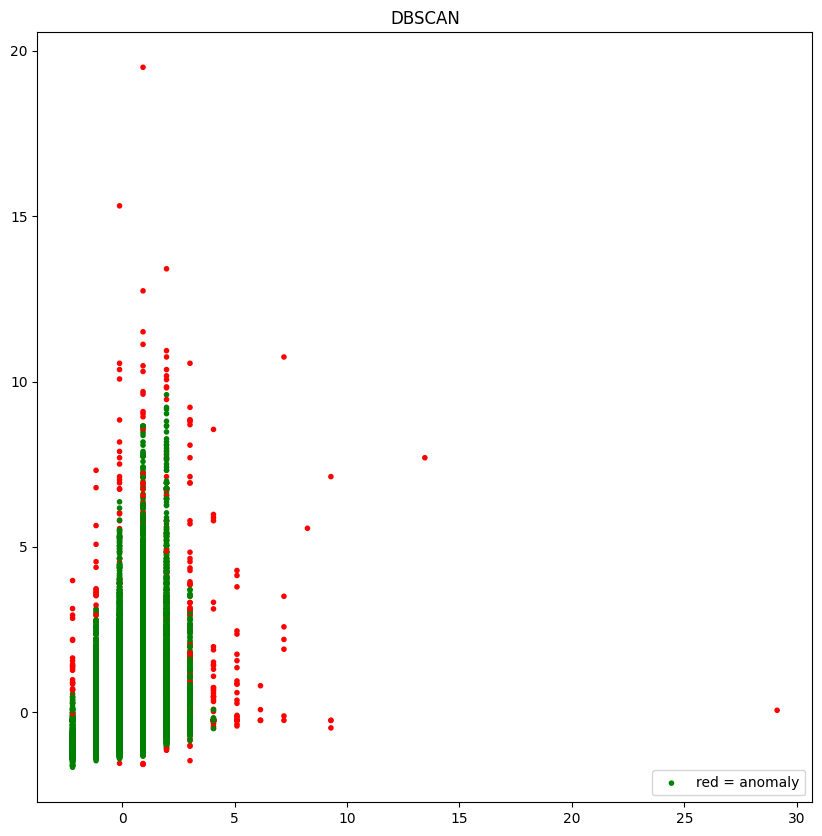

In [4]:
# Fit the DBSCAN model
model = DBSCAN(eps=0.63).fit(X1)
labels = model.labels_

# Label -1 is considered an anomaly
labels = ['anomaly' if x == -1 else 'normal' for x in labels]

# Plot the model
plot_model(labels, 'DBSCAN', 1)